In [116]:
#Import all required libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve,f1_score,roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [117]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [118]:
#Importing the dataset
url='/content/drive/MyDrive/DataSet/apache-ant-1.7.csv'
dataset = pd.read_csv(url)

In [119]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


In [120]:
def generate_auc_roc_curve(lr, X_test):
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC: ="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr)
    plt.legend(loc=4)
    plt.show()
    pass

In [121]:
dataset.head()

,project-name,version,name,wmc,dit,noc,cbo,rfc,lcom,ca,...,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy,is-buggy-boolean
0,ant,1.7,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,...,1.0,29.0,0.63,3.0,1.0,5.0,1.42,0,0,False
1,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,...,3.0,30.0,0.37,3.0,2.0,1.0,4.19,0,0,False
2,ant,1.7,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,...,3.0,21.0,0.93,3.0,3.0,2.0,2.48,0,0,False
3,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,8,1,9,13,20,12,9,...,2.0,25.0,1.33,1.0,5.0,1.0,1.72,0,0,False
4,ant,1.7,org.apache.tools.ant.taskdefs.WaitFor,9,3,0,5,26,16,0,...,2.0,30.0,0.00,3.0,9.0,5.0,7.64,1,1,True


In [122]:
dataset.sample(5)
#Pandas sample() is used to generate a sample random row or column from the function caller data frame.

,project-name,version,name,wmc,dit,noc,cbo,rfc,lcom,ca,...,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy,is-buggy-boolean
270,ant,1.7,org.apache.tools.ant.taskdefs.optional.javacc....,8,3,0,13,57,4,0,...,1.0,28.0,0.34,2.0,4.0,2.0,3.94,0,0,False
295,ant,1.7,org.apache.tools.ant.taskdefs.condition.HasMethod,12,2,0,7,37,44,0,...,1.0,3.0,0.27,2.0,2.0,3.0,3.27,0,0,False
726,ant,1.7,org.apache.tools.ant.listener.CommonsLoggingLi...,14,1,0,10,45,3,0,...,1.0,7.0,1.24,3.0,6.0,5.0,3.70,0,0,False
736,ant,1.7,org.apache.tools.ant.taskdefs.AbstractJarSigne...,24,3,2,14,65,222,2,...,1.0,12.0,0.58,3.0,2.0,4.0,5.33,0,0,False
592,ant,1.7,org.apache.tools.ant.taskdefs.Manifest,16,1,0,8,76,0,3,...,1.0,7.0,0.00,1.0,2.0,1.0,1.56,1,1,True


In [123]:
dataset['is-buggy'].value_counts()
#now we know our dataset is imbalance

0    579
1    166
Name: is-buggy, dtype: int64

In [124]:
dataset['is-buggy'].describe()

count    745.000000
mean       0.222819
std        0.416417
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is-buggy, dtype: float64

In [125]:
list(dataset.columns)
#list(dataset.columns.values)

['project-name',
 'version',
 'name',
 'wmc',
 'dit',
 'noc',
 'cbo',
 'rfc',
 'lcom',
 'ca',
 'ce',
 'npm',
 'lcom3',
 'loc',
 'dam',
 'moa',
 'mfa',
 'cam',
 'ic',
 'cbm',
 'amc',
 'max_cc',
 'avg_cc',
 'fi-changes',
 'ostrand',
 'scattering',
 'intensity',
 'ana',
 'acm',
 'arl',
 'acpd',
 'bug',
 'is-buggy',
 'is-buggy-boolean']

In [126]:
dataset.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,fi-changes,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy
count,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.700000e+00,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,...,39.289933,1.912752,18.702013,1.494470,2.056376,5.042953,3.040268,4.345664,0.453691,0.222819
std,2.221938e-16,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,...,23.661916,0.794241,10.756334,2.521091,0.817839,2.536991,1.427830,2.010039,1.138673,0.416417
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.030000,0.000000,0.000000
25%,1.700000e+00,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,...,21.000000,1.000000,10.000000,0.270000,1.000000,3.000000,2.000000,2.640000,0.000000,0.000000
50%,1.700000e+00,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,...,38.000000,2.000000,18.000000,0.820000,2.000000,5.000000,3.000000,4.160000,0.000000,0.000000
75%,1.700000e+00,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,...,56.000000,3.000000,27.000000,1.280000,3.000000,7.000000,4.000000,6.060000,0.000000,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,...,100.000000,3.000000,48.000000,15.490000,3.000000,9.000000,5.000000,8.000000,10.000000,1.000000


In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project-name      745 non-null    object 
 1   version           745 non-null    float64
 2   name              745 non-null    object 
 3   wmc               745 non-null    int64  
 4   dit               745 non-null    int64  
 5   noc               745 non-null    int64  
 6   cbo               745 non-null    int64  
 7   rfc               745 non-null    int64  
 8   lcom              745 non-null    int64  
 9   ca                745 non-null    int64  
 10  ce                745 non-null    int64  
 11  npm               745 non-null    int64  
 12  lcom3             745 non-null    float64
 13  loc               745 non-null    int64  
 14  dam               745 non-null    float64
 15  moa               745 non-null    int64  
 16  mfa               745 non-null    float64
 1

In [128]:
dataset.shape


(745, 34)

In [129]:
#dataset.drop(columns=['project-name','version','name','acpd', 'is-buggy-boolean'],axis=1,inplace=True)
dataset.drop(['project-name','version','name','acpd','is-buggy-boolean'],axis=1,inplace=True)
dataset.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,avg_cc,fi-changes,ostrand,scattering,intensity,ana,acm,arl,bug,is-buggy
0,3,1,0,10,18,3,1,9,1,1.100,...,0.6667,49.0,1.0,29.0,0.63,3.0,1.0,5.0,0,0
1,5,2,0,4,13,0,1,4,4,0.625,...,0.6000,56.0,3.0,30.0,0.37,3.0,2.0,1.0,0,0
2,1,2,0,1,3,0,0,1,1,2.000,...,0.0000,12.0,3.0,21.0,0.93,3.0,3.0,2.0,0,0
3,8,1,9,13,20,12,9,4,8,0.800,...,0.8750,61.0,2.0,25.0,1.33,1.0,5.0,1.0,0,0
4,9,3,0,5,26,16,0,5,7,0.750,...,1.0000,40.0,2.0,30.0,0.00,3.0,9.0,5.0,1,1


In [130]:
#dataset=dataset.isnull().value_counts()
#dataset=dataset.isnull().values.any()
pd.isnull(dataset).sum().sum()
#pd.isnull(dataset)
#dataset.isnull()

0

In [131]:
#df = dataset.dropna()
#df
# we do not need this step, bcs we dont have null values
#Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.

In [132]:
#How to get column names in Pandas dataframe
len(dataset.columns)

29

In [133]:
dataset.shape

(745, 29)

In [134]:

dataset.dtypes

wmc             int64
dit             int64
noc             int64
cbo             int64
rfc             int64
lcom            int64
ca              int64
ce              int64
npm             int64
lcom3         float64
loc             int64
dam           float64
moa             int64
mfa           float64
cam           float64
ic              int64
cbm             int64
amc           float64
max_cc          int64
avg_cc        float64
fi-changes    float64
ostrand       float64
scattering    float64
intensity     float64
ana           float64
acm           float64
arl           float64
bug             int64
is-buggy        int64
dtype: object

<Axes: xlabel='is-buggy', ylabel='count'>

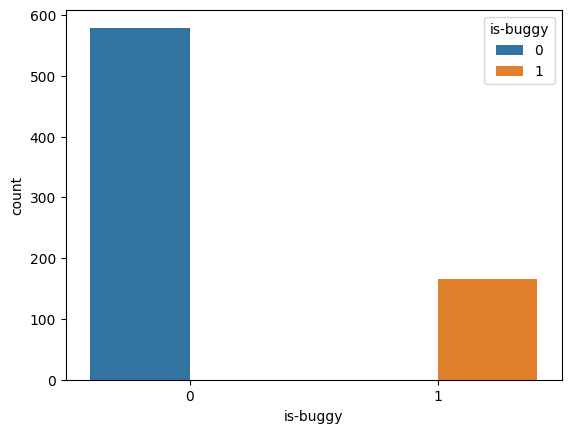

In [135]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
sns.countplot(x = 'is-buggy',hue = 'is-buggy', data = dataset)

In [136]:
#Splitting the dataset into the Training set and Test set. ...

#Let's drop the target coloumn before we do train test split
#X = dataset.drop('is-buggy',axis=1).values
X = dataset.iloc[:, :-1].values
X

array([[3., 1., 0., ..., 1., 5., 0.],
       [5., 2., 0., ..., 2., 1., 0.],
       [1., 2., 0., ..., 3., 2., 0.],
       ...,
       [7., 3., 5., ..., 1., 5., 0.],
       [5., 2., 0., ..., 1., 4., 1.],
       [2., 1., 0., ..., 9., 3., 0.]])

In [137]:
X.dtype

dtype('float64')

In [138]:

#y = dataset['is-buggy']
y = dataset.iloc[:, -1].values.astype(np.float64)
y

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0.

In [139]:
dataset['is-buggy'].value_counts()

0    579
1    166
Name: is-buggy, dtype: int64

In [140]:
# Class count of buggy or not buggy
count_class_0, count_class_1 = dataset['is-buggy'].value_counts()

# Divide by class
df_none_buggy_0 = dataset[dataset['is-buggy'] == 0]
df_buggy_1 = dataset[dataset['is-buggy'] == 1]

In [141]:
count_class_0

579

In [142]:
count_class_1

166

In [143]:
df_none_buggy_0.head(2)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,avg_cc,fi-changes,ostrand,scattering,intensity,ana,acm,arl,bug,is-buggy
0,3,1,0,10,18,3,1,9,1,1.100,...,0.6667,49.0,1.0,29.0,0.63,3.0,1.0,5.0,0,0
1,5,2,0,4,13,0,1,4,4,0.625,...,0.6000,56.0,3.0,30.0,0.37,3.0,2.0,1.0,0,0


In [144]:
df_buggy_1.head(2)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,avg_cc,fi-changes,ostrand,scattering,intensity,ana,acm,arl,bug,is-buggy
4,9,3,0,5,26,16,0,5,7,0.750000,...,1.00,40.0,2.0,30.0,0.0,3.0,9.0,5.0,1,1
6,20,1,0,4,40,130,0,4,18,0.736842,...,1.15,100.0,1.0,17.0,0.0,1.0,6.0,3.0,1,1


In [145]:
#smote = SMOTE(sampling_strategy='minority')
#X_sm, y_sm = smote.fit_resample(X,y)


In [146]:
#from collections import Counter
#print("After SMOTE :" , Counter(y_sm))

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,)
#,shuffle=False

4th Step: Feature scalling

In [148]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
St_Sc= StandardScaler()
Scaled_X_train= St_Sc.fit_transform(X_train)
Scaled_X_test= St_Sc.transform(X_test)

In [149]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Scaled_X_train, y_train)
knn.score(Scaled_X_test, y_test)
knn_y_predicted=knn.predict(Scaled_X_test)
print('Test Accuracy', knn.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,knn_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))

Test Accuracy 0.8973214285714286
testing accuracy2  0.8973214285714286
Train accuracy: 0.9155470249520153
balanced_accuracy: 0.77


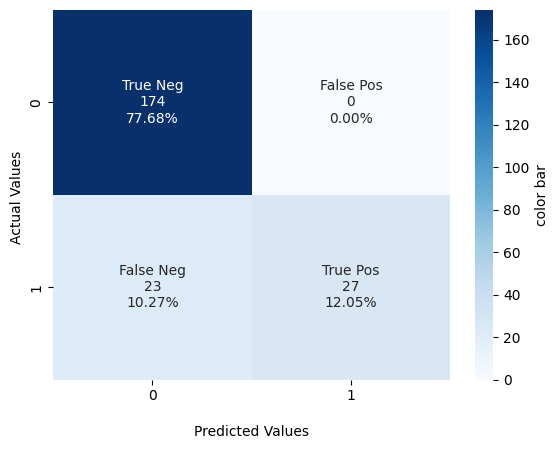

In [150]:
cnf_matrix = metrics.confusion_matrix(y_test,knn_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_predicted))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       174
         1.0       1.00      0.54      0.70        50

    accuracy                           0.90       224
   macro avg       0.94      0.77      0.82       224
weighted avg       0.91      0.90      0.89       224



In [152]:
print("test Accuracy:",accuracy_score(y_test,knn_y_predicted))
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,knn_y_predicted))
print("Recall:",metrics.recall_score(y_test,knn_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,knn_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))
# balanced_accuracy

test Accuracy: 0.8973214285714286
Train accuracy: 0.9155470249520153
Precision: 1.0
Recall: 0.54
F1 Score: 0.7012987012987013
balanced_accuracy: 0.77


In [153]:
lr = LogisticRegression(random_state = 42)
lr.fit(Scaled_X_train, y_train)
lr.score(Scaled_X_test, y_test)
lr_y_predicted=lr.predict(Scaled_X_test)
print('Test Accuracy', lr.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,lr_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {lr.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))

Test Accuracy 0.9955357142857143
testing accuracy2  0.9955357142857143
Train accuracy: 1.0
balanced_accuracy: 0.9971264367816092


In [154]:
#lr_y_predicted

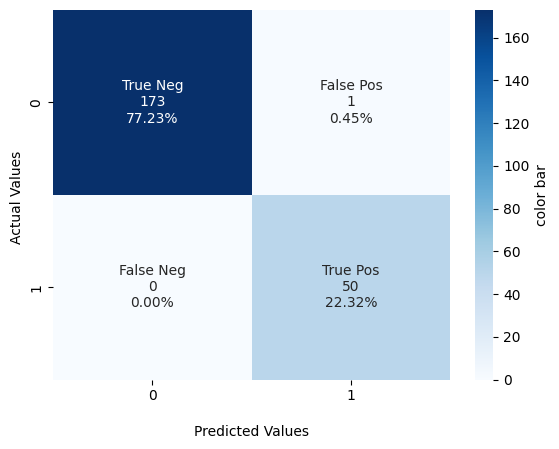

In [155]:
cnf_matrix = metrics.confusion_matrix(y_test,lr_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       174
         1.0       0.98      1.00      0.99        50

    accuracy                           1.00       224
   macro avg       0.99      1.00      0.99       224
weighted avg       1.00      1.00      1.00       224



In [157]:
print("test Accuracy:",accuracy_score(y_test,lr_y_predicted))
print(f'Train accuracy: {lr.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,lr_y_predicted))
print("Recall:",metrics.recall_score(y_test,lr_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,lr_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))
# balanced_accuracy

test Accuracy: 0.9955357142857143
Train accuracy: 1.0
Precision: 0.9803921568627451
Recall: 1.0
F1 Score: 0.99009900990099
balanced_accuracy: 0.9971264367816092


In [158]:

svm = SVC(C=1.0, kernel='linear', degree=3,probability=True)
svm.fit(Scaled_X_train, y_train)
svm.score(Scaled_X_test, y_test)
svm_y_predicted=svm.predict(Scaled_X_test)
training_accuracy=accuracy_score(y_test,svm_y_predicted);
print("training accuracy ",training_accuracy);
print('Test Accuracy Score', svm.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))

training accuracy  1.0
Test Accuracy Score 1.0
balanced_accuracy: 1.0


In [159]:
svm_y_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0.])

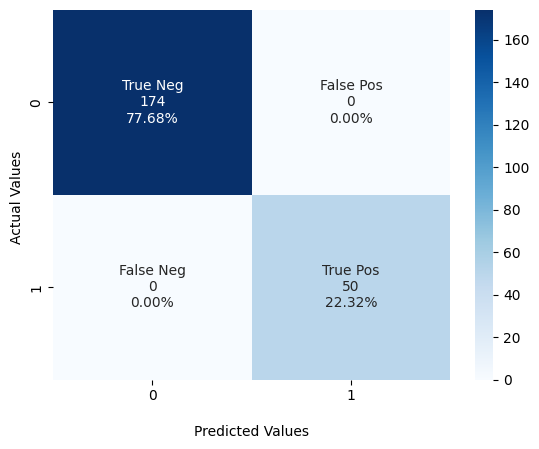

In [160]:
cnf_matrix = metrics.confusion_matrix(y_test,svm_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [162]:
print("Testing Accuracy:",accuracy_score(y_test,svm_y_predicted))
print("Precision:",metrics.precision_score(y_test,svm_y_predicted))
print("Recall:",metrics.recall_score(y_test,svm_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,svm_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))
# balanced_accuracy

Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [163]:

# rf = RandomForestClassifier(max_features=0.01,n_estimators=500)
rf=RandomForestClassifier(max_features=0.2, n_estimators = 1000,n_jobs = -1,random_state =1)
rf.fit(Scaled_X_train, y_train)
rf.score(Scaled_X_test, y_test)
rf_y_predicted=rf.predict(Scaled_X_test)
test_accuracy=accuracy_score(y_test,rf_y_predicted);
print("test_accuracy ",test_accuracy);
print('training accuracy',rf.score(Scaled_X_train,y_train))
print('Test Accuracy ', rf.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))

test_accuracy  1.0
training accuracy 1.0
Test Accuracy  1.0
balanced_accuracy: 1.0


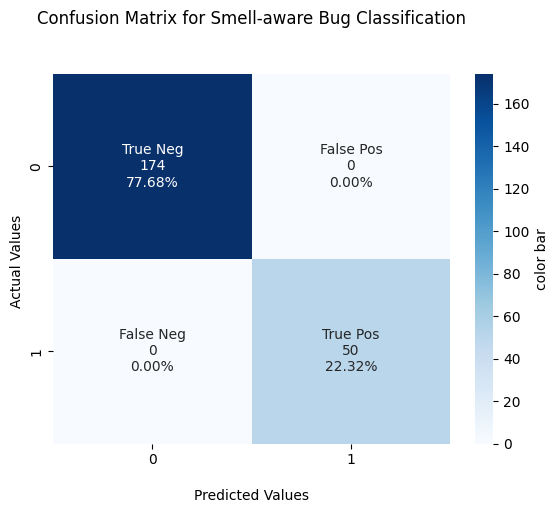

In [164]:
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar_kws={"orientation":'vertical', "label":"color bar"})

ax.set_title('Confusion Matrix for Smell-aware Bug Classification\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [166]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,rf_y_predicted))
print("Precision:",metrics.precision_score(y_test,rf_y_predicted))
print("Recall:",metrics.recall_score(y_test,rf_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,rf_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))
# balanced_accuracy

Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [167]:
nb = GaussianNB()
nb.fit(Scaled_X_train, y_train)
nb.score(Scaled_X_test, y_test)
nb_y_predicted=nb.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,nb_y_predicted);
print("testing accuracy ",testing_accuracy);
print("training accuracy",nb.score(Scaled_X_train,y_train))
print('Test Accuracy Score', nb.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))

testing accuracy  0.9821428571428571
training accuracy 0.9712092130518234
Test Accuracy Score 0.9821428571428571
balanced_accuracy: 0.9885057471264368


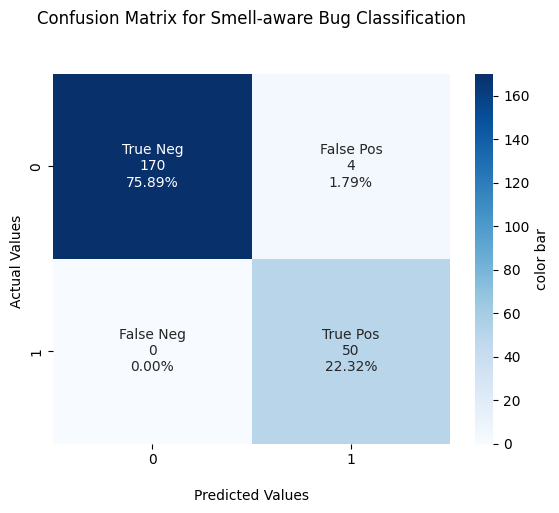

In [168]:
cnf_matrix = metrics.confusion_matrix(y_test,nb_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

ax.set_title('Confusion Matrix for Smell-aware Bug Classification\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       174
         1.0       0.93      1.00      0.96        50

    accuracy                           0.98       224
   macro avg       0.96      0.99      0.97       224
weighted avg       0.98      0.98      0.98       224



In [170]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,nb_y_predicted))
print("Precision:",metrics.precision_score(y_test,nb_y_predicted))
print("Recall:",metrics.recall_score(y_test,nb_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,nb_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))
# balanced_accuracy

Testing Accuracy: 0.9821428571428571
Precision: 0.9259259259259259
Recall: 1.0
F1 Score: 0.9615384615384615
balanced_accuracy: 0.9885057471264368


**Prediction probabilities**

In [171]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

In [172]:
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:,1]

**Calculate AUROC**

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [173]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)

**Print AUROC scores**

In [174]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic regression: AUROC = %.3f' % (lr_auc))
print('Support victor machine: AUROC = %.3f' % (svm_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Neighrest Nighbor: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic regression: AUROC = 0.997
Support victor machine: AUROC = 1.000
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 0.991
K Neighrest Nighbor: AUROC = 0.890


**Calculate ROC curve**

In [175]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr,_ = roc_curve(y_test,knn_probs)

**Plot the ROC curve**

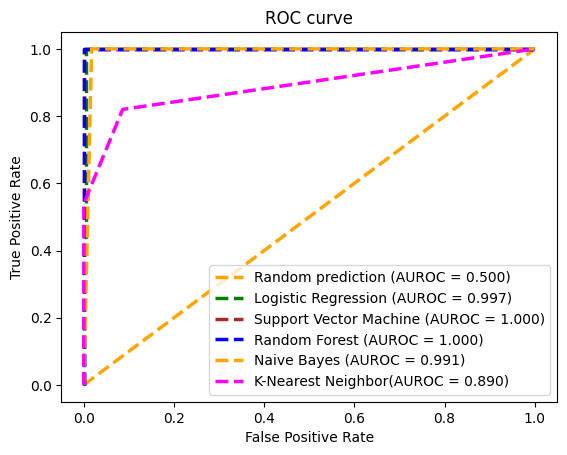

In [176]:
plt.plot(r_fpr, r_tpr, linestyle='--',color="orange", label='Random prediction (AUROC = %0.3f)' % r_auc,linewidth=2.5)
plt.plot(lr_fpr, lr_tpr, linestyle='--',color="green", label='Logistic Regression (AUROC = %0.3f)' % lr_auc,linewidth=2.5)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color="brown", label='Support Vector Machine (AUROC = %0.3f)' % svm_auc,linewidth=2.5)
plt.plot(rf_fpr, rf_tpr, linestyle='--',color="blue", label='Random Forest (AUROC = %0.3f)' % rf_auc,linewidth=2.5)
plt.plot(nb_fpr, nb_tpr, linestyle='--', color="orange", label='Naive Bayes (AUROC = %0.3f)' % nb_auc,linewidth=2.5)
plt.plot(knn_fpr, knn_tpr, linestyle='--', color="fuchsia", label='K-Nearest Neighbor(AUROC = %0.3f)' % knn_auc,linewidth=2.5)

#plt.plot(rf_fpr, rf_tpr, marker='.',color="yellow", label='Random Forest (AUROC = %0.3f)' % rf_auc)
#plt.plot(nb_fpr, nb_tpr, marker='.', color="green", label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

# New Section

In [177]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')

# if __name__ == '__main__':

#  x = ["SVM classifier", "RF classifier","LR classifier", "NB classifier","KNN classifier"]
#  y= [100, 100, 99, 97,92,]
#  plt.figure(figsize = (10, 5))
#  plt.bar(x, y)

#  addlabels(x, y)

#     # giving title to the plot
#  plt.title("Comperision of the training accuracy")

#     # giving X and Y labels
#  plt.xlabel(" comparision of different classifiers")
#  plt.ylabel("Accuracy")

#     # visualizing the plot
#  plt.show()

Logistic Regression: f1=0.990 auc=0.984
Random Forest: f1=1.000 auc=1.000
Naive Bayes: f1=0.962 auc=0.972
Support Vector Machine: f1=1.000 auc=1.000


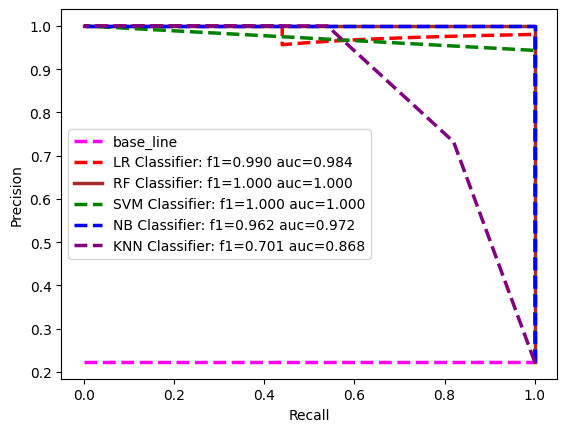

In [178]:
# predict probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

# predict class values
lr_y_predicted= lr.predict(Scaled_X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test,lr_y_predicted), auc(lr_recall, lr_precision)

rf_y_predicted= rf.predict(Scaled_X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test,rf_y_predicted), auc(rf_recall, rf_precision)

nb_y_predicted= nb.predict(Scaled_X_test)
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_f1, nb_auc = f1_score(y_test,nb_y_predicted), auc(nb_recall, nb_precision)

svm_y_predicted= svm.predict(Scaled_X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test,svm_y_predicted), auc(svm_recall, svm_precision)


knn_y_predicted= knn.predict(Scaled_X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test,knn_y_predicted), auc(knn_recall, knn_precision)

# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))
print('Support Vector Machine: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))

# plot the precision-recall curves
base_line = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [base_line, base_line],color='fuchsia', linestyle='--', label='base_line',linewidth=2.5)
plt.plot(lr_recall, lr_precision, linestyle='--',color='red', label='LR Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(rf_recall, rf_precision,linestyle='-', color='brown',label='RF Classifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(nb_recall, nb_precision, linestyle='--', color='green', label='SVM Classifier: f1=%.3f auc=%.3f' % (svm_f1, svm_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(svm_recall, svm_precision, linestyle='--',color='blue', label='NB Classifier: f1=%.3f auc=%.3f' % (nb_f1, nb_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(knn_recall, knn_precision, linestyle='--',color='purple', label='KNN Classifier: f1=%.3f auc=%.3f' % (knn_f1, knn_auc),linewidth=2.5)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


**Second step**

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#,shuffle=False

In [180]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
St_Sc= StandardScaler()
Scaled_X_train= St_Sc.fit_transform(X_train)
Scaled_X_test= St_Sc.transform(X_test)

In [181]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Scaled_X_train, y_train)
knn.score(Scaled_X_test, y_test)
knn_y_predicted=knn.predict(Scaled_X_test)
print('Test Accuracy', knn.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,knn_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))

Test Accuracy 0.8973214285714286
testing accuracy2  0.8973214285714286
Train accuracy: 0.9155470249520153
balanced_accuracy: 0.77


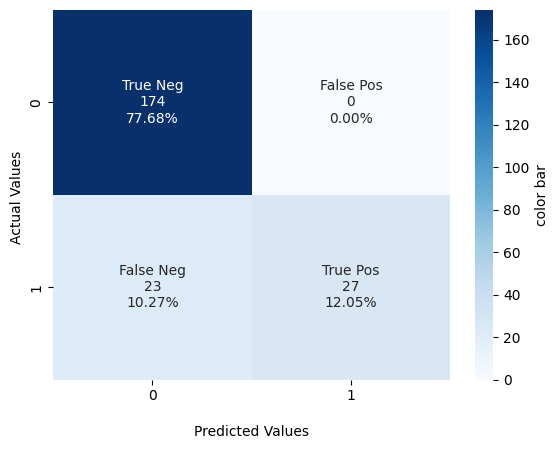

In [182]:
cnf_matrix = metrics.confusion_matrix(y_test,knn_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_predicted))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       174
         1.0       1.00      0.54      0.70        50

    accuracy                           0.90       224
   macro avg       0.94      0.77      0.82       224
weighted avg       0.91      0.90      0.89       224



In [184]:
print("test Accuracy:",accuracy_score(y_test,knn_y_predicted))
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,knn_y_predicted))
print("Recall:",metrics.recall_score(y_test,knn_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,knn_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))
# balanced_accuracy

test Accuracy: 0.8973214285714286
Train accuracy: 0.9155470249520153
Precision: 1.0
Recall: 0.54
F1 Score: 0.7012987012987013
balanced_accuracy: 0.77


In [185]:
lr = LogisticRegression(random_state = 42)
lr.fit(Scaled_X_train, y_train)
lr.score(Scaled_X_test, y_test)
lr_y_predicted=lr.predict(Scaled_X_test)
print('Test Accuracy Score', lr.score(Scaled_X_test,y_test));
print('test accuracy2', accuracy_score(y_test,lr_y_predicted));
training_accuracy=lr.score(Scaled_X_train,y_train);
print("training accuracy ",training_accuracy);
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))

Test Accuracy Score 0.9955357142857143
test accuracy2 0.9955357142857143
training accuracy  1.0
balanced_accuracy: 0.9971264367816092


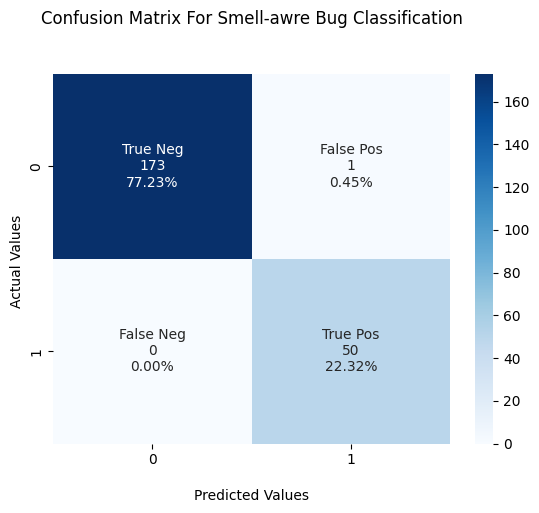

In [186]:
cnf_matrix = metrics.confusion_matrix(y_test,lr_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
#ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

ax.set_title('Confusion Matrix For Smell-awre Bug Classification\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       174
         1.0       0.98      1.00      0.99        50

    accuracy                           1.00       224
   macro avg       0.99      1.00      0.99       224
weighted avg       1.00      1.00      1.00       224



In [188]:
print("Testing accuracy:",metrics.accuracy_score(y_test,lr_y_predicted))
print("Precision:",metrics.precision_score(y_test,lr_y_predicted))
print("Recall:",metrics.recall_score(y_test,lr_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,lr_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))
# balanced_accuracy

Testing accuracy: 0.9955357142857143
Precision: 0.9803921568627451
Recall: 1.0
F1 Score: 0.99009900990099
balanced_accuracy: 0.9971264367816092


In [189]:
svm = SVC(C=1.0, kernel='linear', degree=3,probability=True)
svm.fit(Scaled_X_train, y_train)
svm.score(Scaled_X_test, y_test)
svm_y_predicted=svm.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,svm_y_predicted);
print("testing accuracy ",testing_accuracy);
print("training accuracy",svm.score(Scaled_X_train,y_train))
print('Test Accuracy2', svm.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))

testing accuracy  1.0
training accuracy 1.0
Test Accuracy2 1.0
balanced_accuracy: 1.0


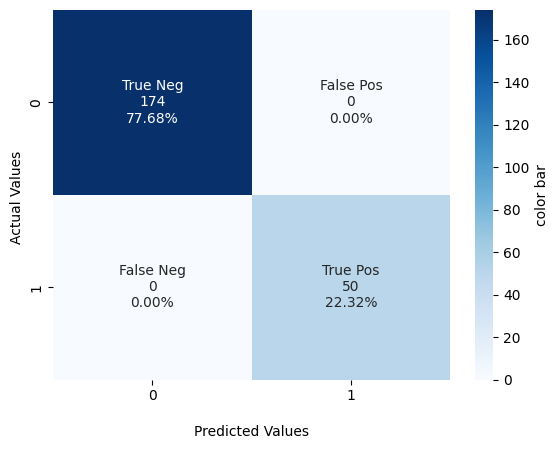

In [190]:
cnf_matrix = metrics.confusion_matrix(y_test,svm_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [191]:

from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [192]:

print("Testing accuracy:",metrics.accuracy_score(y_test,svm_y_predicted))
print("Precision:",metrics.precision_score(y_test,svm_y_predicted))
print("Recall:",metrics.recall_score(y_test,svm_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,svm_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))
# balanced_accuracy

Testing accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [193]:

# rf = RandomForestClassifier(max_features=0.01,n_estimators=500)
rf=RandomForestClassifier(max_features=0.2, n_estimators = 1000,n_jobs = -1,random_state =1)
rf.fit(Scaled_X_train, y_train)
rf.score(Scaled_X_test, y_test)
rf_y_predicted=svm.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,rf_y_predicted);
print("testing accuracy ",testing_accuracy);
print('Test Accuracy2', rf.score(Scaled_X_test,y_test));
print('training accuracy',rf.score(Scaled_X_train,y_train))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))

testing accuracy  1.0
Test Accuracy2 1.0
training accuracy 1.0
balanced_accuracy: 1.0


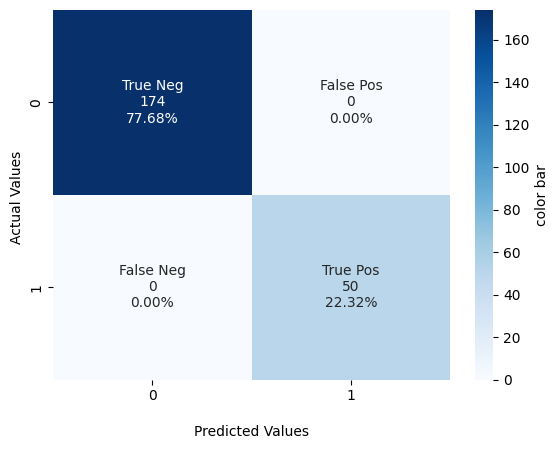

In [194]:
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [196]:
print("Testing accuracy:",metrics.accuracy_score(y_test,rf_y_predicted))
print("Precision:",metrics.precision_score(y_test,rf_y_predicted))
print("Recall:",metrics.recall_score(y_test,rf_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,rf_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))
# balanced_accuracy

Testing accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [197]:

nb = GaussianNB()
nb.fit(Scaled_X_train, y_train)
nb.score(Scaled_X_test, y_test)
nb_y_predicted=nb.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,nb_y_predicted);
print("testing accuracy ",testing_accuracy);
print("trianing accuracy",nb.score(Scaled_X_train,y_train))
print('Test Accuracy2', nb.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))

testing accuracy  0.9821428571428571
trianing accuracy 0.9712092130518234
Test Accuracy2 0.9821428571428571
balanced_accuracy: 0.9885057471264368


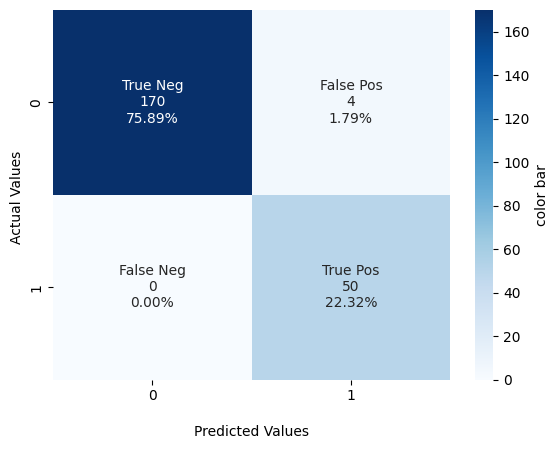

In [198]:
cnf_matrix = metrics.confusion_matrix(y_test,nb_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       174
         1.0       0.93      1.00      0.96        50

    accuracy                           0.98       224
   macro avg       0.96      0.99      0.97       224
weighted avg       0.98      0.98      0.98       224



In [200]:

print("Testing Accuracy:",metrics.accuracy_score(y_test,nb_y_predicted))
print("Precision:",metrics.precision_score(y_test,nb_y_predicted))
print("Recall:",metrics.recall_score(y_test,nb_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,nb_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))
# balanced_accuracy

Testing Accuracy: 0.9821428571428571
Precision: 0.9259259259259259
Recall: 1.0
F1 Score: 0.9615384615384615
balanced_accuracy: 0.9885057471264368


In [201]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

In [202]:
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [203]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

In [204]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic regression: AUROC = %.3f' % (lr_auc))
print('Support victor machine: AUROC = %.3f' % (svm_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Nighbors: AUROC = %.3f' % (knn_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)



Random (chance) Prediction: AUROC = 0.500
Logistic regression: AUROC = 0.997
Support victor machine: AUROC = 1.000
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 0.991
K Nearest Nighbors: AUROC = 0.890


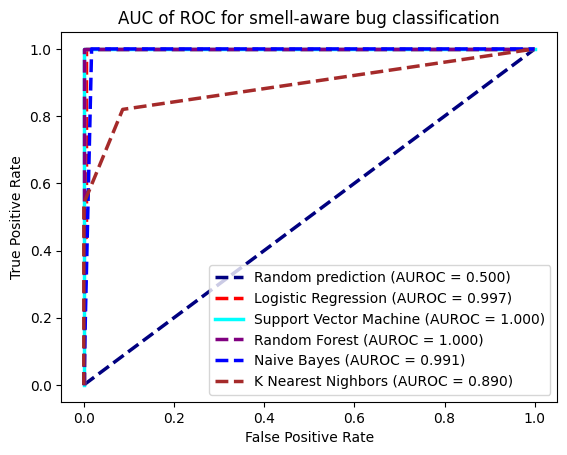

In [205]:

plt.plot(r_fpr, r_tpr, linestyle='--',color="navy", label='Random prediction (AUROC = %0.3f)' % r_auc,linewidth=2.5)
plt.plot(lr_fpr, lr_tpr, linestyle='--',color="red", label='Logistic Regression (AUROC = %0.3f)' % lr_auc,linewidth=2.5)
plt.plot(svm_fpr, svm_tpr, linestyle='-',color="Cyan", label='Support Vector Machine (AUROC = %0.3f)' % svm_auc,linewidth=2.5)
plt.plot(rf_fpr, rf_tpr, linestyle='--',color="purple", label='Random Forest (AUROC = %0.3f)' % rf_auc,linewidth=2.5)
plt.plot(nb_fpr, nb_tpr, linestyle='--', color="blue", label='Naive Bayes (AUROC = %0.3f)' % nb_auc,linewidth=2.5)
plt.plot(knn_fpr, knn_tpr, linestyle='--', color="brown", label='K Nearest Nighbors (AUROC = %0.3f)' % knn_auc,linewidth=2.5)

# Title
plt.title('AUC of ROC for smell-aware bug classification')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

Logistic Regression: f1=0.990 auc=0.984
Random Forest: f1=1.000 auc=1.000
Naive Bayes: f1=0.962 auc=0.972
Support Vector Machine: f1=1.000 auc=1.000
K Nearest Nighbor: f1=0.701 auc=0.868


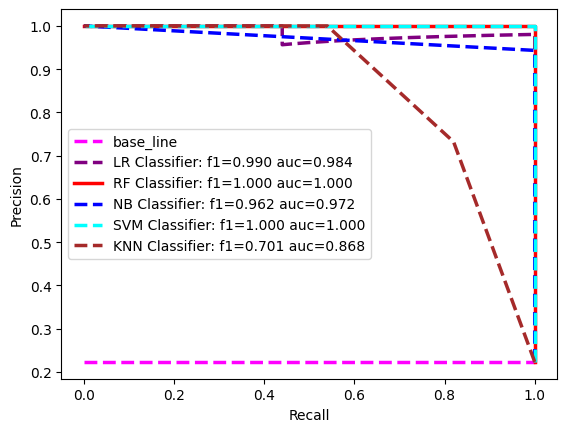

In [206]:
# predict probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

# predict class values
lr_y_predicted= lr.predict(Scaled_X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test,lr_y_predicted), auc(lr_recall, lr_precision)

rf_y_predicted= rf.predict(Scaled_X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test,rf_y_predicted), auc(rf_recall, rf_precision)

svm_y_predicted= svm.predict(Scaled_X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test,svm_y_predicted), auc(svm_recall, svm_precision)

nb_y_predicted= nb.predict(Scaled_X_test)
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_f1, nb_auc = f1_score(y_test,nb_y_predicted), auc(nb_recall, nb_precision)

knn_y_predicted= knn.predict(Scaled_X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test,knn_y_predicted), auc(knn_recall, knn_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))
print('Support Vector Machine: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))
print('K Nearest Nighbor: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

# plot the precision-recall curves
base_line = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [base_line, base_line],color='fuchsia', linestyle='--', label='base_line',linewidth=2.5)

plt.plot(lr_recall, lr_precision, color='purple',linestyle='--', label='LR Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(rf_recall, rf_precision, linestyle='-', color='red',label='RF Classifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(nb_recall, nb_precision, linestyle='--', color='blue',label='NB Classifier: f1=%.3f auc=%.3f' % (nb_f1, nb_auc),linewidth=2.5)
base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(svm_recall, svm_precision, linestyle='--',color='Cyan', label='SVM Classifier: f1=%.3f auc=%.3f' % (svm_f1, svm_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(knn_recall, knn_precision, linestyle='--',color='brown', label='KNN Classifier: f1=%.3f auc=%.3f' % (knn_f1, knn_auc),linewidth=2.5)


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


**Third step**

**ROC and auc curve steps:**

In [207]:
#Prediction probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
#,shuffle=False
#feature Scaling
from sklearn.preprocessing import StandardScaler
St_Sc= StandardScaler()
Scaled_X_train= St_Sc.fit_transform(X_train)
Scaled_X_test= St_Sc.transform(X_test)

In [209]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Scaled_X_train, y_train)
knn.score(Scaled_X_test, y_test)
knn_y_predicted=knn.predict(Scaled_X_test)
print('Test Accuracy', knn.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,knn_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))

Test Accuracy 0.8954423592493298
testing accuracy2  0.8954423592493298
Train accuracy: 0.9032258064516129
balanced_accuracy: 0.7328767123287672


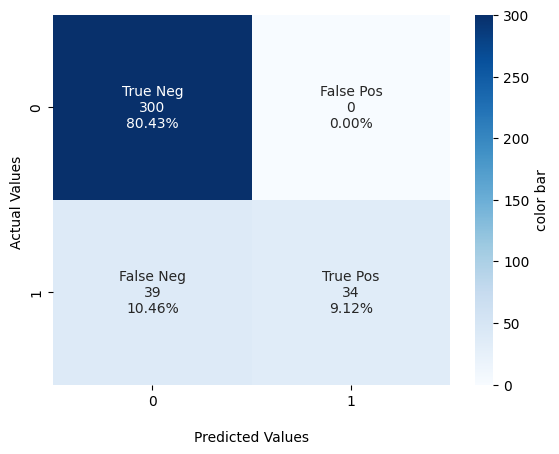

In [210]:
cnf_matrix = metrics.confusion_matrix(y_test,knn_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_predicted))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       300
         1.0       1.00      0.47      0.64        73

    accuracy                           0.90       373
   macro avg       0.94      0.73      0.79       373
weighted avg       0.91      0.90      0.88       373



In [212]:
print("test Accuracy:",accuracy_score(y_test,knn_y_predicted))
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,knn_y_predicted))
print("Recall:",metrics.recall_score(y_test,knn_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,knn_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))
# balanced_accuracy

test Accuracy: 0.8954423592493298
Train accuracy: 0.9032258064516129
Precision: 1.0
Recall: 0.4657534246575342
F1 Score: 0.6355140186915887
balanced_accuracy: 0.7328767123287672


In [213]:

lr = LogisticRegression(random_state = 42)
lr.fit(Scaled_X_train, y_train)
lr.score(Scaled_X_test, y_test)
lr_y_predicted=lr.predict(Scaled_X_test)
print('Test Accuracy1', lr.score(Scaled_X_test,y_test));
testing_accuracy=accuracy_score(y_test,lr_y_predicted);
print("testing accuracy ",testing_accuracy);
print('training accuracy',lr.score(Scaled_X_train,y_train))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))

Test Accuracy1 0.9919571045576407
testing accuracy  0.9919571045576407
training accuracy 0.9973118279569892
balanced_accuracy: 0.984634703196347


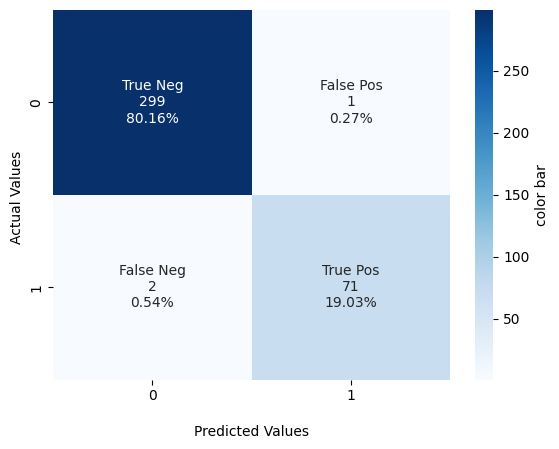

In [214]:
cnf_matrix = metrics.confusion_matrix(y_test,lr_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predicted))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       300
         1.0       0.99      0.97      0.98        73

    accuracy                           0.99       373
   macro avg       0.99      0.98      0.99       373
weighted avg       0.99      0.99      0.99       373



In [216]:
print("Testing accuracy:",metrics.accuracy_score(y_test,lr_y_predicted))
print("Precision:",metrics.precision_score(y_test,lr_y_predicted))
print("Recall:",metrics.recall_score(y_test,lr_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,lr_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))
# balanced_accuracy

Testing accuracy: 0.9919571045576407
Precision: 0.9861111111111112
Recall: 0.9726027397260274
F1 Score: 0.9793103448275863
balanced_accuracy: 0.984634703196347


In [217]:

svm = SVC(C=1.0, kernel='linear', degree=3,probability=True)
svm.fit(Scaled_X_train, y_train)
svm.score(Scaled_X_test, y_test)
svm_y_predicted=svm.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,svm_y_predicted);
print("testing accuracy ",testing_accuracy);
print('Test Accuracy Score2', svm.score(Scaled_X_test,y_test));
print('training accuracy',svm.score(Scaled_X_train,y_train))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))

testing accuracy  1.0
Test Accuracy Score2 1.0
training accuracy 1.0
balanced_accuracy: 1.0


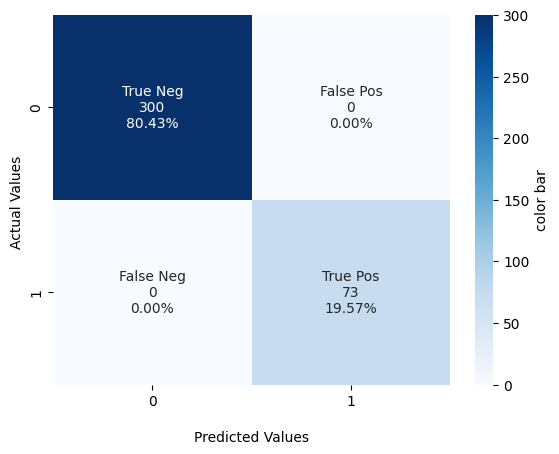

In [218]:
cnf_matrix = metrics.confusion_matrix(y_test,svm_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [219]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300
         1.0       1.00      1.00      1.00        73

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



In [220]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,svm_y_predicted))
print("Precision:",metrics.precision_score(y_test,svm_y_predicted))
print("Recall:",metrics.recall_score(y_test,svm_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,svm_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))
# balanced_accuracy

Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [221]:

# rf = RandomForestClassifier(max_features=0.01,n_estimators=500)
rf=RandomForestClassifier(max_features=0.2, n_estimators = 1000,n_jobs = -1,random_state =1)
rf.fit(Scaled_X_train, y_train)
rf.score(Scaled_X_test, y_test)
rf_y_predicted=svm.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,rf_y_predicted);
print("testing accuracy ",testing_accuracy);
print('training accuracy',rf.score(Scaled_X_train,y_train))
print('Test Accuracy2', svm.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))

testing accuracy  1.0
training accuracy 1.0
Test Accuracy2 1.0
balanced_accuracy: 1.0


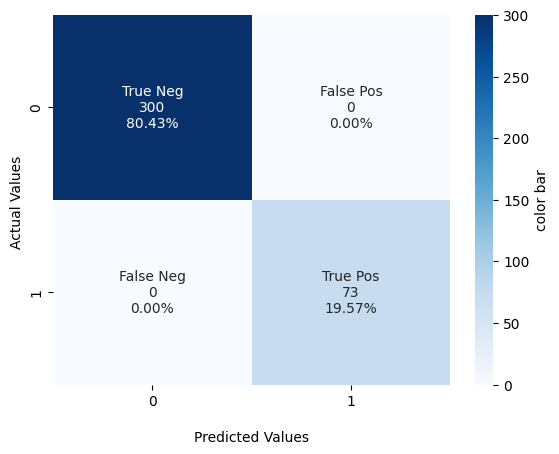

In [222]:
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300
         1.0       1.00      1.00      1.00        73

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



In [224]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,rf_y_predicted))
print("Precision:",metrics.precision_score(y_test,rf_y_predicted))
print("Recall:",metrics.recall_score(y_test,rf_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,rf_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))
# balanced_accuracy

Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
balanced_accuracy: 1.0


In [225]:
nb = GaussianNB()
nb.fit(Scaled_X_train, y_train)
nb.score(Scaled_X_test, y_test)
nb_y_predicted=nb.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,nb_y_predicted);
print("testing accuracy ",testing_accuracy);
print('training accuracy',nb.score(Scaled_X_train,y_train))
print('Test Accuracy Score', nb.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))

testing accuracy  0.9839142091152815
training accuracy 0.9704301075268817
Test Accuracy Score 0.9839142091152815
balanced_accuracy: 0.99


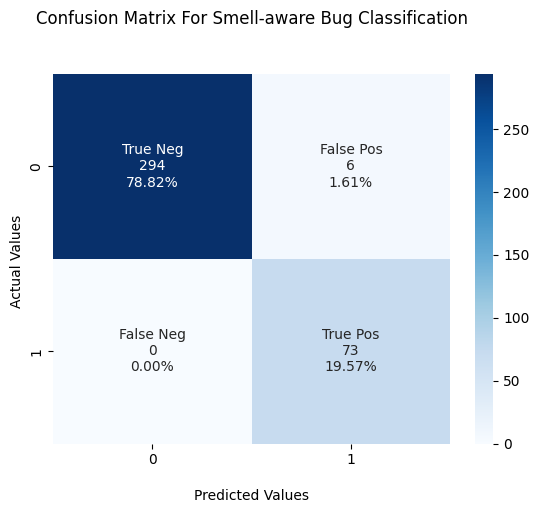

In [226]:
cnf_matrix = metrics.confusion_matrix(y_test,nb_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix For Smell-aware Bug Classification\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       300
         1.0       0.92      1.00      0.96        73

    accuracy                           0.98       373
   macro avg       0.96      0.99      0.98       373
weighted avg       0.99      0.98      0.98       373



In [228]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,nb_y_predicted))
print("Precision:",metrics.precision_score(y_test,nb_y_predicted))
print("Recall:",metrics.recall_score(y_test,nb_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,nb_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))
# balanced_accuracy

Testing Accuracy: 0.9839142091152815
Precision: 0.9240506329113924
Recall: 1.0
F1 Score: 0.9605263157894737
balanced_accuracy: 0.99


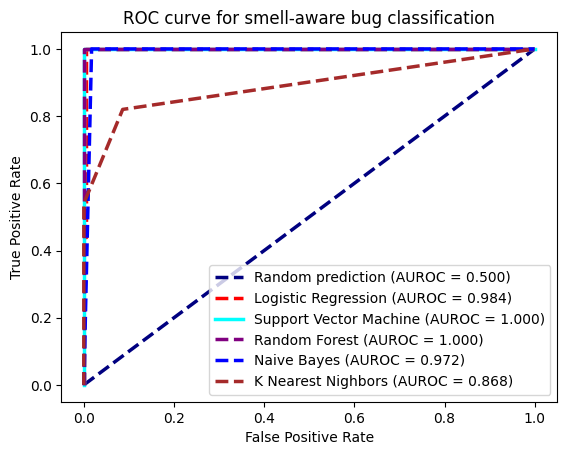

In [229]:

plt.plot(r_fpr, r_tpr, linestyle='--',color="navy", label='Random prediction (AUROC = %0.3f)' % r_auc, linewidth=2.5)
plt.plot(lr_fpr, lr_tpr, linestyle='--',color="red", label='Logistic Regression (AUROC = %0.3f)' % lr_auc,linewidth=2.5)
plt.plot(svm_fpr, svm_tpr, linestyle='-',color="Cyan", label='Support Vector Machine (AUROC = %0.3f)' % svm_auc, linewidth=2.5)
plt.plot(rf_fpr, rf_tpr, linestyle='--',color="purple", label='Random Forest (AUROC = %0.3f)' % rf_auc, linewidth=2.5)
plt.plot(nb_fpr, nb_tpr, linestyle='--', color="blue", label='Naive Bayes (AUROC = %0.3f)' % nb_auc, linewidth=2.5)
plt.plot(knn_fpr, knn_tpr, linestyle='--', color="brown", label='K Nearest Nighbors (AUROC = %0.3f)' % knn_auc, linewidth=2.5)

# Title
plt.title('ROC curve for smell-aware bug classification')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

**Precision and Recall Curve:**


Logistic Regression: f1=0.979 auc=0.982
Random Forest: f1=1.000 auc=1.000
Naive Bayes: f1=0.961 auc=0.974
Support Vector Machine: f1=1.000 auc=1.000
K Nearest Nighbor: f1=0.636 auc=0.807


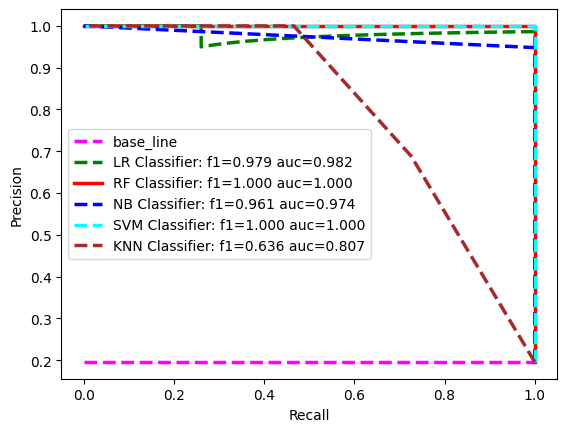

In [230]:
# predict probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

# predict class values
lr_y_predicted= lr.predict(Scaled_X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test,lr_y_predicted), auc(lr_recall, lr_precision)

rf_y_predicted= rf.predict(Scaled_X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test,rf_y_predicted), auc(rf_recall, rf_precision)

svm_y_predicted= svm.predict(Scaled_X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test,svm_y_predicted), auc(svm_recall, svm_precision)

nb_y_predicted= nb.predict(Scaled_X_test)
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_f1, nb_auc = f1_score(y_test,nb_y_predicted), auc(nb_recall, nb_precision)

knn_y_predicted= knn.predict(Scaled_X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test,knn_y_predicted), auc(knn_recall, knn_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))
print('Support Vector Machine: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))
print('K Nearest Nighbor: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

# plot the precision-recall curves
base_line = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [base_line, base_line],color='fuchsia', linestyle='--', label='base_line', linewidth=2.5)

plt.plot(lr_recall, lr_precision, color='green',linestyle='--', label='LR Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc), linewidth=2.5)
base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(rf_recall, rf_precision, linestyle='-', color='red',label='RF Classifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc), linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(nb_recall, nb_precision, linestyle='--', color='blue', label='NB Classifier: f1=%.3f auc=%.3f' % (nb_f1, nb_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(svm_recall, svm_precision, linestyle='--',color='Cyan', label='SVM Classifier: f1=%.3f auc=%.3f' % (svm_f1, svm_auc), linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(knn_recall, knn_precision, linestyle='--',color='brown', label='KNN Classifier: f1=%.3f auc=%.3f' % (knn_f1, knn_auc), linewidth=2.5)


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
